In [14]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'inferno']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
import sys
sys.path.append("/Users/gregoirelejay/dev/personal/tag_walk/tag_walk") 
# sys.path.append("/usr/local/lib/python2.7/site-packages")
print(sys.executable)
import fachung
import inferno.trainers

/usr/local/opt/python3/bin/python3.6


In [16]:
import torchvision.transforms as transforms
from fachung.datasets.tagwalk import TagwalkDataset

# BASE_DATA = '/Volumes/bobby/tag_walk/tag_walk/data/tag_walk/'
BASE_DATA = '../data/tag_walk/'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

DEFAULT_TRANSFORMS = (
    transforms.Compose([
#         transforms.RandomSizedCrop(224),
#         transforms.RandomHorizontalFlip(),
        transforms.Scale((224, 224)),
        transforms.ToTensor(),
        normalize
    ])
)

tw_dataset = TagwalkDataset(
    csv_path=BASE_DATA + 'assocs.csv',
    img_path=BASE_DATA + 'images/all',
    transform=DEFAULT_TRANSFORMS
)

In [17]:
print(tw_dataset.num_classes)
tw_dataset[0][0].shape

50


torch.Size([3, 224, 224])

In [18]:
from fachung.datasets.tagwalk import tagwalk_dataloader
tw_dataloader = tagwalk_dataloader(tw_dataset)

In [20]:
print(type(tw_dataloader))
print(type(iter(tw_dataloader)))

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoaderIter'>


In [30]:
it = iter(tw_dataloader)

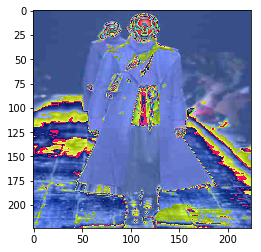

In [56]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

to_pl = transforms.ToPILImage()
plt.imshow(to_pl(tw_dataset[0][0]))